In [25]:
import os
os.listdir()

['second_model.ipynb',
 'data',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

# load

In [27]:
file_path = './data/train_KnnFilled(2016~2017).csv'

In [28]:
df = pd.read_csv(file_path, index_col = 0, parse_dates = True)
print(df.shape)
df.head()

(52704, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2016-05-09 00:00:00,399.996956,401.962157,400.757148,402.245915,401.143639,400.998932,400.048649,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.050917,4.045456,6.484379,0.089541,0.08942,-1.007740,1.635430,0.050999
2016-05-09 00:10:00,399.996956,401.939352,400.954632,402.245915,401.004025,400.998932,400.244686,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.157893,4.152288,6.449854,0.089541,0.08942,-1.007740,1.624784,0.050999
2016-05-09 00:20:00,399.996956,401.905143,400.896549,402.104563,401.004025,400.998932,400.094776,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.207893,4.202220,6.440330,0.089541,0.08942,-0.905851,1.649624,0.050999
2016-05-09 00:30:00,399.996956,401.950754,400.896549,402.304812,401.004025,400.998932,400.140902,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.152079,4.146482,6.464140,0.089541,0.08942,-0.518671,1.635430,0.050999
2016-05-09 00:40:00,399.996956,401.996366,400.850082,402.175239,401.004025,400.998932,400.406128,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.016615,4.011200,6.415329,0.089541,0.08942,-0.987362,1.653172,0.050999


# define target

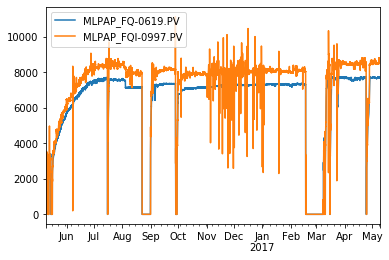

In [29]:
df[['MLPAP_FQ-0619.PV','MLPAP_FQI-0997.PV']].plot();plt.show()

In [30]:
# 創建單耗欄位
df['target'] = df['MLPAP_FQ-0619.PV']/df['MLPAP_FQI-0997.PV']
df = df.drop(['MLPAP_FQ-0619.PV','MLPAP_FQI-0997.PV'],axis=1)

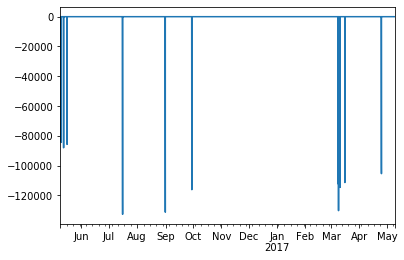

In [31]:
df['target'].plot();plt.show()

# 單耗BOXPLOT

count     52704.000
mean       -438.806
std        6572.021
min     -132633.046
25%           0.898
50%           0.905
75%           0.918
max          31.457
Name: target, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f69fc0f30f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f69fc0f3780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f69fc1aada0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f69fc0f3e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f69fc109198>],
 'means': []}

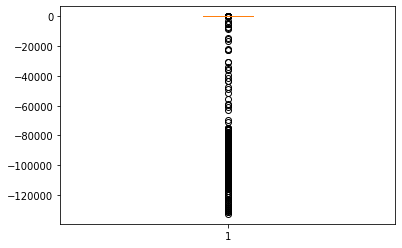

In [32]:
print(df['target'].describe().apply(lambda x:round(x,3)))
plt.boxplot(df['target'])

# IQR Filter

count    44042.000000
mean         0.904750
std          0.012617
min          0.867696
25%          0.897232
50%          0.903898
75%          0.911400
max          0.947387
Name: target, dtype: float64


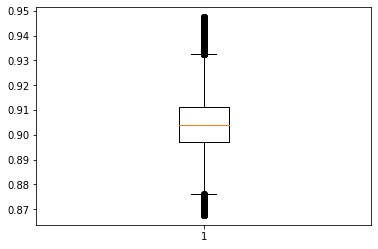

In [33]:
df['target_over_range'] =0
Q3 = df['target'].quantile(0.75)
Q1 = df['target'].quantile(0.25)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
out = (df['target']<lb)|(df['target']>ub)
df.loc[out,'target_over_range'] = 1

# 繪圖
print(df.loc[df['target_over_range']==0,'target'].describe())
plt.boxplot(df.loc[df['target_over_range']==0,'target']);plt.show()

In [34]:
a = df[df['target_over_range']==1].sample(1)
b = df[df['target_over_range']==0].sample(1)
pd.concat([a,b],axis=0)

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range
2017-03-16 19:20:00,380.995723,395.394111,395.796819,399.772262,392.999491,391.280295,388.897637,389.0011,384.004196,376.030098,...,4.182893,4.177254,31.838725,0.089541,0.08942,355.299586,1.376390,0.074998,1.083813,1
2016-06-13 20:30:00,394.001107,418.998026,427.998298,436.606132,426.995492,422.005604,408.305242,393.9961,382.998634,376.131369,...,13.583414,13.565102,28.150517,0.089541,0.08942,478.891461,2.029313,0.066001,0.922026,0


# corr

In [35]:
df.iloc[:,10:20].corr().style.background_gradient()

,MLPAP_TI-0706B12,MLPAP_TI-0706B13,MLPAP_TI-0706B14,MLPAP_TI-0706B15,MLPAP_TI-0706B16,MLPAP_TI-0706B17,MLPAP_TI-0706B18,MLPAP_TI-0706B19,MLPAP_TI-0706B20,MLPAP_TI-0706B21
MLPAP_TI-0706B12,1,0.999435,0.999504,0.038247,0.998681,0.997666,0.996028,0.994421,0.993262,0.836182
MLPAP_TI-0706B13,0.999435,1,0.999868,0.0504358,0.999533,0.999157,0.998266,0.997244,0.996441,0.839717
MLPAP_TI-0706B14,0.999504,0.999868,1,0.0531947,0.999755,0.999252,0.998202,0.997064,0.996162,0.840249
MLPAP_TI-0706B15,0.038247,0.0504358,0.0531947,1,0.0568266,0.0610859,0.0668921,0.0755001,0.0764792,0.10026
MLPAP_TI-0706B16,0.998681,0.999533,0.999755,0.0568266,1,0.999791,0.999074,0.998164,0.997415,0.842913
MLPAP_TI-0706B17,0.997666,0.999157,0.999252,0.0610859,0.999791,1,0.999722,0.999152,0.998627,0.844319
MLPAP_TI-0706B18,0.996028,0.998266,0.998202,0.0668921,0.999074,0.999722,1,0.999819,0.999555,0.8454
MLPAP_TI-0706B19,0.994421,0.997244,0.997064,0.0755001,0.998164,0.999152,0.999819,1,0.999916,0.845963
MLPAP_TI-0706B20,0.993262,0.996441,0.996162,0.0764792,0.997415,0.998627,0.999555,0.999916,1,0.846064
MLPAP_TI-0706B21,0.836182,0.839717,0.840249,0.10026,0.842913,0.844319,0.8454,0.845963,0.846064,1


# 處裡共線性

In [12]:
corrs = abs(df.corr())
threshold = 1
above_threshold_vars = {}
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

for key, value in above_threshold_vars.items():
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  1


In [13]:
# do remove
df = df.drop(cols_to_remove,axis=1)

In [14]:
df.corr().style.background_gradient()

# Recursive Feature Elimination

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

rfe = RFE(estimator = Ridge(),n_features_to_select = 38)

X = df
y = df['target']

new_X = rfe.fit_transform(X,y)
new_X = pd.DataFrame(new_X,index = X.index,columns = X.columns[rfe.get_support()])
df = new_X
df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_FR-0632.PV,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range
2016-05-09 00:00:00,399.996956,401.962157,402.245915,401.143639,400.998932,402.001481,402.997679,402.048413,401.047635,402.998548,...,-0.001134,399.694655,401.207034,4.050917,4.045456,6.484379,1.635430,0.050999,5.428077,1.0
2016-05-09 00:10:00,399.996956,401.939352,402.245915,401.004025,400.998932,402.001481,403.098684,402.003686,401.047635,402.998548,...,-0.001134,399.694655,401.089849,4.157893,4.152288,6.449854,1.624784,0.050999,5.428077,1.0
2016-05-09 00:20:00,399.996956,401.905143,402.104563,401.004025,400.998932,402.001481,402.997679,402.003686,401.004128,402.998548,...,-0.001134,399.739510,401.060553,4.207893,4.202220,6.440330,1.649624,0.050999,5.428077,1.0
2016-05-09 00:30:00,399.996956,401.950754,402.304812,401.004025,400.998932,402.001481,403.098684,402.003686,401.102020,402.998548,...,-0.001134,399.795577,401.470701,4.152079,4.146482,6.464140,1.635430,0.050999,5.428077,1.0
2016-05-09 00:40:00,399.996956,401.996366,402.175239,401.004025,400.998932,402.001481,403.098684,402.003686,401.145528,402.998548,...,-0.001134,399.795577,401.460935,4.016615,4.011200,6.415329,1.653172,0.050999,5.428077,1.0


In [16]:
df.corr().style.background_gradient()

In [17]:
print(df.shape)
df.head()

(52704, 38)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_FR-0632.PV,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range
2016-05-09 00:00:00,399.996956,401.962157,402.245915,401.143639,400.998932,402.001481,402.997679,402.048413,401.047635,402.998548,...,-0.001134,399.694655,401.207034,4.050917,4.045456,6.484379,1.635430,0.050999,5.428077,1.0
2016-05-09 00:10:00,399.996956,401.939352,402.245915,401.004025,400.998932,402.001481,403.098684,402.003686,401.047635,402.998548,...,-0.001134,399.694655,401.089849,4.157893,4.152288,6.449854,1.624784,0.050999,5.428077,1.0
2016-05-09 00:20:00,399.996956,401.905143,402.104563,401.004025,400.998932,402.001481,402.997679,402.003686,401.004128,402.998548,...,-0.001134,399.739510,401.060553,4.207893,4.202220,6.440330,1.649624,0.050999,5.428077,1.0
2016-05-09 00:30:00,399.996956,401.950754,402.304812,401.004025,400.998932,402.001481,403.098684,402.003686,401.102020,402.998548,...,-0.001134,399.795577,401.470701,4.152079,4.146482,6.464140,1.635430,0.050999,5.428077,1.0
2016-05-09 00:40:00,399.996956,401.996366,402.175239,401.004025,400.998932,402.001481,403.098684,402.003686,401.145528,402.998548,...,-0.001134,399.795577,401.460935,4.016615,4.011200,6.415329,1.653172,0.050999,5.428077,1.0


# save

In [18]:
df.to_csv('./data/train_FeatureSelected(2016~2017).csv')